In [1]:
import numpy as np
import torch
from torch.nn.functional import conv3d as torchConv3D

Воспользуемся формулами:

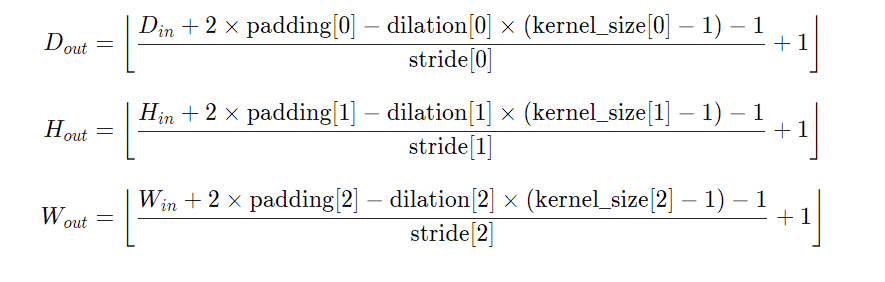

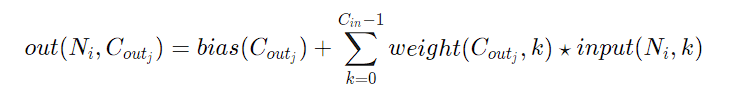

Реализуем функцию:

In [22]:
def conv3D(input_t, kernel, stride = 1, padding= 0, dilation=1):
# Проверка
    if input_t.ndim != 3 or kernel.ndim != 3:
        raise ValueError("Input и kernel должны быть 3D")
    
    input_t = np.pad(input_t, padding, mode='constant')

    img_height, img_width, img_d = input_t.shape
    kernel_height, kernel_width, kernel_d = kernel.shape

# Определение размерности 
    output_h = int((img_height + 2 * padding -dilation * (kernel_height -1) -1)/stride + 1)
    output_w = int((img_width + 2 * padding -dilation * (kernel_width -1) -1)/stride + 1)
    output_d = int((img_d + 2 * padding -dilation * (kernel_d -1) -1)/stride + 1)

    # output_h = (input_t.shape[0] - kernel.shape[0]) // stride + 1
    # output_w = (input_t.shape[1] - kernel.shape[1]) // stride + 1
    # output_d = (input_t.shape[2] - kernel.shape[2]) // stride + 1
    output_array = np.zeros((output_h, output_w, output_d))
    
# Свёртка
    for i in range(output_d):
        for j in range(output_w):
            for k in range(output_h):
                window = input_t[k:k+kernel.shape[0], j:j+kernel.shape[1], i:i+kernel.shape[2]]
                output_array[k, j, i] = np.sum(window * kernel)

    return output_array


Проведём запуск:

In [23]:
input_a = np.random.rand(4, 4, 4)
kernel = np.random.rand(3, 3, 3)

# print("Input:")
# print(input_a)
# print("Kernel:")
# print(kernel)

test1_output1 = conv3D(input_a, kernel)
test1_output1 = torch.from_numpy(test1_output1)

print("Результат моей функции Convolution3D:")
print(test1_output1)
print("\nРезультат функции Conv3d из библиотеки PyTorch:")

input_t = torch.tensor(input_a).unsqueeze(0).unsqueeze(0)
kernel_t = torch.tensor(kernel).unsqueeze(0).unsqueeze(0)
test1_output2 = torchConv3D(input_t, kernel_t)
print(test1_output2)

test1_output1 = test1_output1.to(test1_output2.dtype)

torch.allclose(test1_output1, test1_output2)

Результат моей функции Convolution3D:
tensor([[[6.8762, 6.8331],
         [6.7500, 7.5454]],

        [[7.7380, 6.8559],
         [6.4961, 6.0861]]], dtype=torch.float64)

Результат функции Conv3d из библиотеки PyTorch:
tensor([[[[[6.8762, 6.8331],
           [6.7500, 7.5454]],

          [[7.7380, 6.8559],
           [6.4961, 6.0861]]]]], dtype=torch.float64)


True

Проведём тесты:

In [14]:
def test_1():
    input_a = np.random.rand(4, 4, 4)
    kernel = np.random.rand(3, 3, 3)
    
    my3D = conv3D(input_a, kernel)
    my3D = torch.from_numpy(my3D)
   
    input_t = torch.tensor(input_a).unsqueeze(0).unsqueeze(0)
    kernel_t = torch.tensor(kernel).unsqueeze(0).unsqueeze(0)
    
    torch3D = torchConv3D(input_t, kernel_t)
    my3D = my3D.to(torch3D.dtype)
    
    assert torch.allclose(my3D, torch3D)

def test_2():
    input_a = np.random.rand(8, 8, 8)
    kernel = np.random.rand(3, 3, 3)
    
    my3D = conv3D(input_a, kernel)
    my3D = torch.from_numpy(my3D)
    
    input_t = torch.tensor(input_a).unsqueeze(0).unsqueeze(0)
    kernel_t = torch.tensor(kernel).unsqueeze(0).unsqueeze(0)
    
    torch3D = torchConv3D(input_t, kernel_t)
    my3D = my3D.to(torch3D.dtype)
    
    assert torch.allclose(my3D, torch3D)


def test_3():
    input_a = np.random.rand(4, 4, 4)
    kernel = np.random.rand(2, 2, 2)
    
    my3D = conv3D(input_a, kernel)
    my3D = torch.from_numpy(my3D)
    
    input_t = torch.tensor(input_a).unsqueeze(0).unsqueeze(0)
    kernel_t = torch.tensor(kernel).unsqueeze(0).unsqueeze(0)
    
    torch3D = torchConv3D(input_t, kernel_t)
    my3D = my3D.to(torch3D.dtype)
    
    assert torch.allclose(my3D, torch3D)
def test_4():
    input_a = np.random.rand(8, 8, 8)
    kernel = np.random.rand(2, 2, 2)
    
    my3D = conv3D(input_a, kernel)
    my3D = torch.from_numpy(my3D)
    
    input_t = torch.tensor(input_a).unsqueeze(0).unsqueeze(0)
    kernel_t = torch.tensor(kernel).unsqueeze(0).unsqueeze(0)
    
    torch3D = torchConv3D(input_t, kernel_t)
    my3D = my3D.to(torch3D.dtype)
    
    assert torch.allclose(my3D, torch3D)

Успешные тесты

In [15]:
test_1()
test_2()
test_3()
test_4()

Тесты с заранее подготовленной ошибкой:

In [13]:
test_1()
test_2()
test_3()
test_4()

ValueError: Input и kernel должны быть 3D